In [ ]:
!pip install git+https://github.com/ulaval-damas/glo4030-labs.git

  Cloning https://github.com/ulaval-damas/glo4030-labs.git to /tmp/pip-req-build-jdqlio_g
  Running command git clone --filter=blob:none --quiet https://github.com/ulaval-damas/glo4030-labs.git /tmp/pip-req-build-jdqlio_g
  Resolved https://github.com/ulaval-damas/glo4030-labs.git to commit 77a2594181ee3c89005c2bc0669ee3007f565568
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.2/214.2 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from deeplib.datasets import load_mnist, train_valid_loaders
from torchvision.transforms import ToTensor

mnist, mnist_test = load_mnist()
mnist.transform = ToTensor()
mnist_test.transform = ToTensor()

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 48.7MB/s]


Extracting /root/GLO-4030/datasets/mnist/MNIST/raw/train-images-idx3-ubyte.gz to /root/GLO-4030/datasets/mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.61MB/s]


Extracting /root/GLO-4030/datasets/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to /root/GLO-4030/datasets/mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 13.8MB/s]


Extracting /root/GLO-4030/datasets/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/GLO-4030/datasets/mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.26MB/s]

Extracting /root/GLO-4030/datasets/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/GLO-4030/datasets/mnist/MNIST/raw



In [ ]:
train_loader, val_loader = train_valid_loaders(mnist, batch_size=128)
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.fc = nn.Linear(28*28, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.fc(x)

In [ ]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    train_acc_list, val_acc_list, loss_list = [], [], []

    for epoch in range(num_epochs):
        model.train()
        correct, total, running_loss = 0, 0, 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_acc = 100 * correct / total
        train_acc_list.append(train_acc)
        loss_list.append(running_loss / len(train_loader))

        # Validation
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        val_acc = 100 * correct / total
        val_acc_list.append(val_acc)

        print(f"Epoch {epoch+1}: Loss={loss_list[-1]:.4f}, Train Acc={train_acc:.2f}%, Val Acc={val_acc:.2f}%")

    return train_acc_list, val_acc_list, loss_list

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model1 = LinearModel().to(device)
criterion1 = nn.MultiMarginLoss()
optimizer1 = optim.SGD(model1.parameters(), lr=0.1, weight_decay=1e-4)

print("\nTraining with MultiMarginLoss:")
train_acc1, val_acc1, loss1 = train_model(model1, train_loader, val_loader, criterion1, optimizer1)

model2 = LinearModel().to(device)
criterion2 = nn.CrossEntropyLoss()
optimizer2 = optim.SGD(model2.parameters(), lr=0.1, weight_decay=1e-4)

print("\nTraining with CrossEntropyLoss:")
train_acc2, val_acc2, loss2 = train_model(model2, train_loader, val_loader, criterion2, optimizer2)


Training with MultiMarginLoss:
Epoch 1: Loss=0.1006, Train Acc=85.87%, Val Acc=88.92%
Epoch 2: Loss=0.0593, Train Acc=89.46%, Val Acc=89.92%
Epoch 3: Loss=0.0532, Train Acc=90.26%, Val Acc=90.22%
Epoch 4: Loss=0.0499, Train Acc=90.59%, Val Acc=90.47%
Epoch 5: Loss=0.0478, Train Acc=90.84%, Val Acc=90.78%
Epoch 6: Loss=0.0462, Train Acc=91.00%, Val Acc=90.91%
Epoch 7: Loss=0.0450, Train Acc=91.10%, Val Acc=91.11%
Epoch 8: Loss=0.0441, Train Acc=91.28%, Val Acc=91.13%
Epoch 9: Loss=0.0433, Train Acc=91.36%, Val Acc=91.07%
Epoch 10: Loss=0.0426, Train Acc=91.46%, Val Acc=91.13%

Training with CrossEntropyLoss:
Epoch 1: Loss=0.6153, Train Acc=85.33%, Val Acc=88.46%
Epoch 2: Loss=0.3900, Train Acc=89.49%, Val Acc=89.55%
Epoch 3: Loss=0.3545, Train Acc=90.20%, Val Acc=90.09%
Epoch 4: Loss=0.3358, Train Acc=90.67%, Val Acc=90.52%
Epoch 5: Loss=0.3243, Train Acc=91.03%, Val Acc=90.81%
Epoch 6: Loss=0.3159, Train Acc=91.22%, Val Acc=90.97%
Epoch 7: Loss=0.3096, Train Acc=91.40%, Val Acc=91.08%

In [ ]:
def visualize_weights(model, title):
    with torch.no_grad():
        weights = model.fc.weight.cpu().numpy()

    fig, axes = plt.subplots(2, 5, figsize=(12, 6), dpi=150)
    for i, ax in enumerate(axes.flat):
        weight_img = weights[i].reshape(28, 28)

        # Normalisation
        weight_img = (weight_img - weight_img.min()) / (weight_img.max() - weight_img.min())
        ax.imshow(weight_img, cmap="gray", interpolation="none")
        ax.set_title(f"Classe {i}")
        ax.axis("off")

    plt.suptitle(title, fontsize=14)
    plt.show()



Visualisation des poids - MultiMarginLoss:


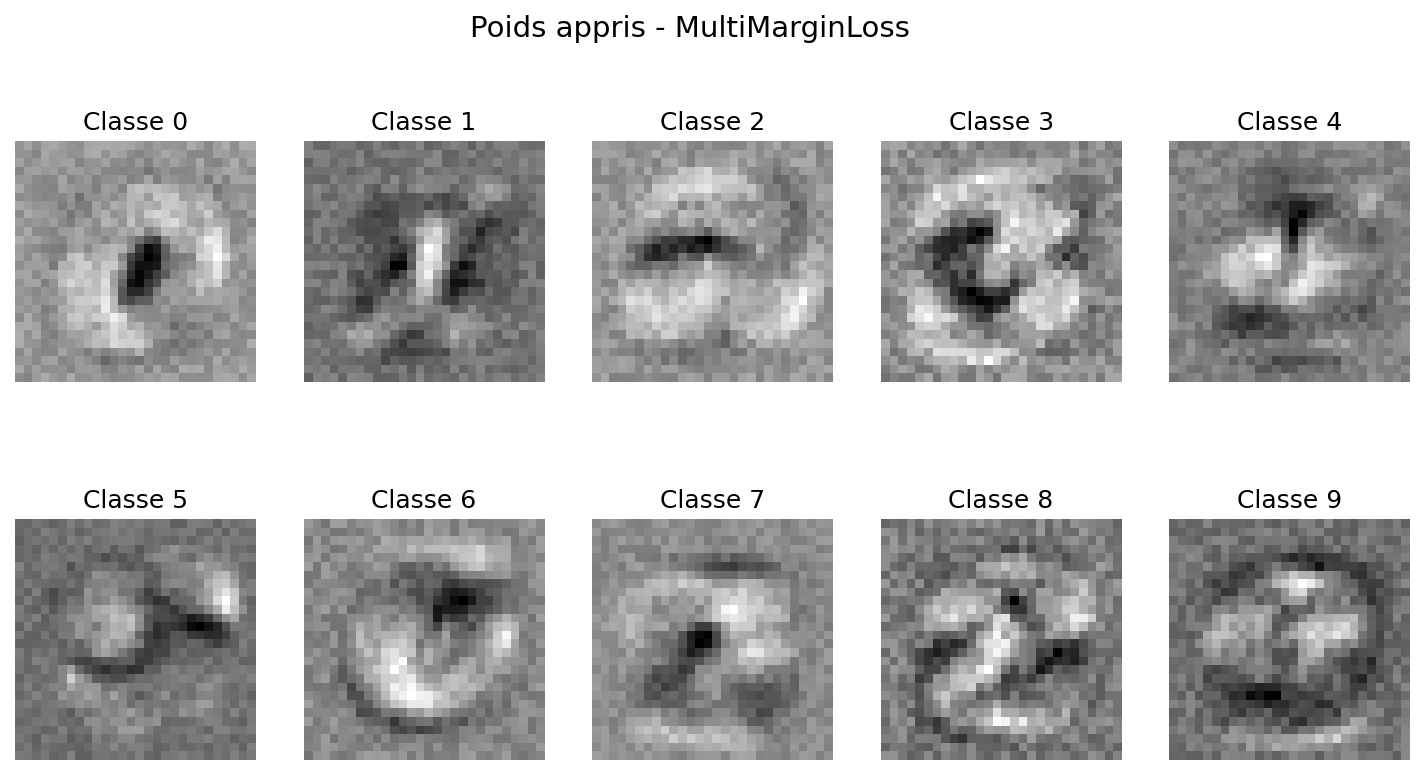


Visualisation des poids - CrossEntropyLoss:


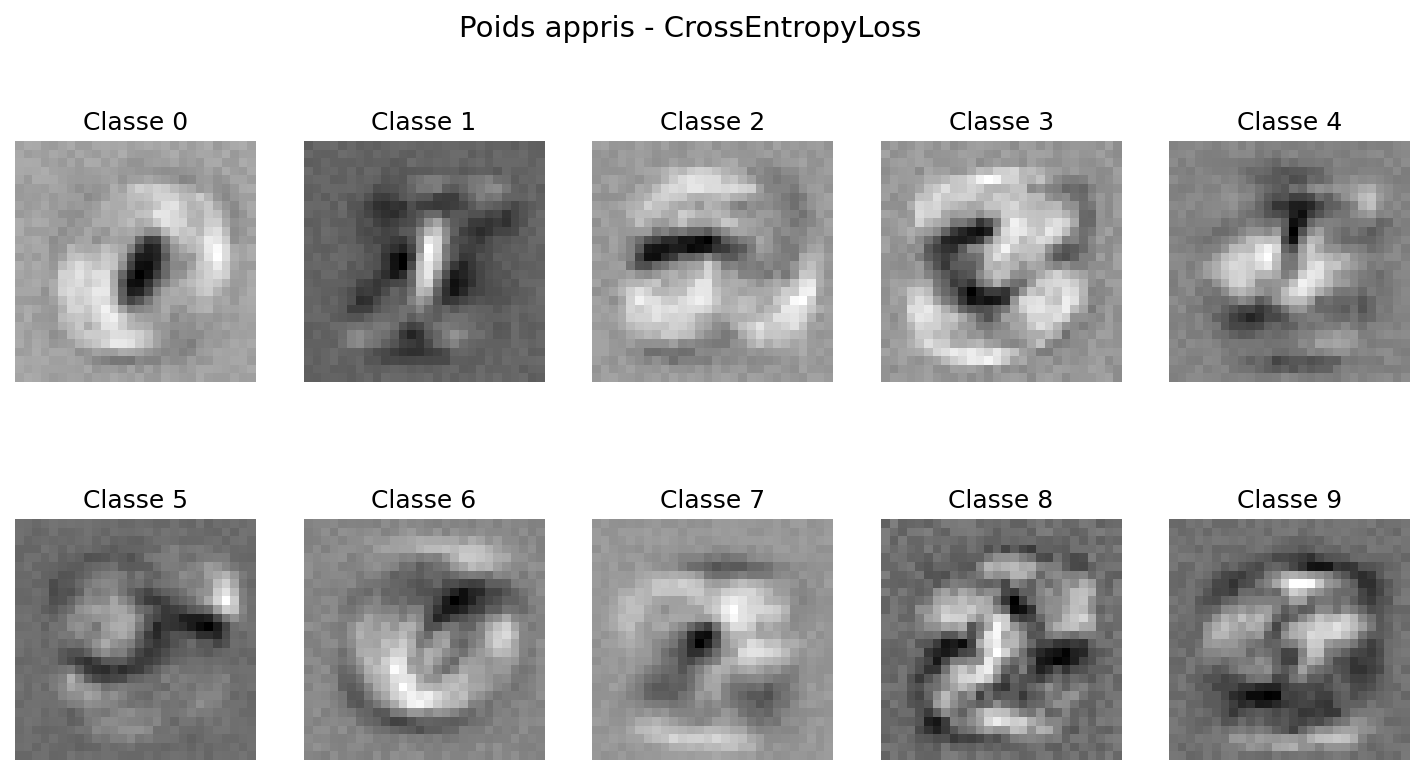

In [ ]:
# Visualisation des poids
print("\nVisualisation des poids - MultiMarginLoss:")
visualize_weights(model1, "Poids appris - MultiMarginLoss")

print("\nVisualisation des poids - CrossEntropyLoss:")
visualize_weights(model2, "Poids appris - CrossEntropyLoss")